In [712]:
# %pip install pandas
# %pip install matplotlib

In [713]:
import pandas as pd
import matplotlib.pyplot as plt

### Чтение датасета

In [714]:
df = pd.read_csv('job.csv')

### Имена колонок

In [715]:
df.columns

Index(['job_title', 'company_name', 'location', 'start_date', 'ctc',
       'experience', 'posted'],
      dtype='object')

### Длинна датасета


In [716]:
len(df)

4596

### Список уникальных job_title

In [717]:
df["job_title"].unique()

array(['Business Development Associate',
       'IELTS/PTE/Spoken English Trainer', 'Fashion Designer', ...,
       'Civil Engineer', 'Design Engineer', 'Senior Sales Associate'],
      dtype=object)

### Разбить колонку ctc на 2 ctc_max и ctc_min

In [718]:
df[['ctc_min', 'ctc_max']] = df['ctc'].str.split('-', expand=True)

### Очистить датафрейм от строк где ctc_max или ctc_min не число

In [719]:
df = df.dropna(subset=['ctc_min', 'ctc_max'])

# чистим числа
df["ctc_min"] = df["ctc_min"].replace({'₹': '', ',': '','\$':''}, regex=True).astype(int)
df["ctc_max"] = df["ctc_max"].replace({'₹': '', ',': '','\$':''}, regex=True).astype(int)


### уникальный job_title

In [720]:

grouped = df.groupby("job_title")

### Среднее ctc_min

In [721]:

mean_ctc_min = grouped["ctc_min"].mean()
mean_ctc_min

job_title
.NET Developer                                 291428.571429
2D Animator                                    200000.000000
3D Animator                                    200000.000000
3D Animator In Blender (Medical Animations)    200000.000000
3D Designer                                    300000.000000
                                                   ...      
WordPress Developer                            276250.000000
Workshop Trainer                               200000.000000
YouTube Influencer                             300000.000000
Zonal Assistant Manager- Logistics             360000.000000
iOS App Developer                              200000.000000
Name: ctc_min, Length: 1535, dtype: float64

### Среднее ctc_max

In [722]:

mean_ctc_max = grouped["ctc_max"].mean()
mean_ctc_max 

job_title
.NET Developer                                 488571.428571
2D Animator                                    240000.000000
3D Animator                                    300000.000000
3D Animator In Blender (Medical Animations)    500000.000000
3D Designer                                    400000.000000
                                                   ...      
WordPress Developer                            446250.000000
Workshop Trainer                               250000.000000
YouTube Influencer                             450000.000000
Zonal Assistant Manager- Logistics             400000.000000
iOS App Developer                              370000.000000
Name: ctc_max, Length: 1535, dtype: float64

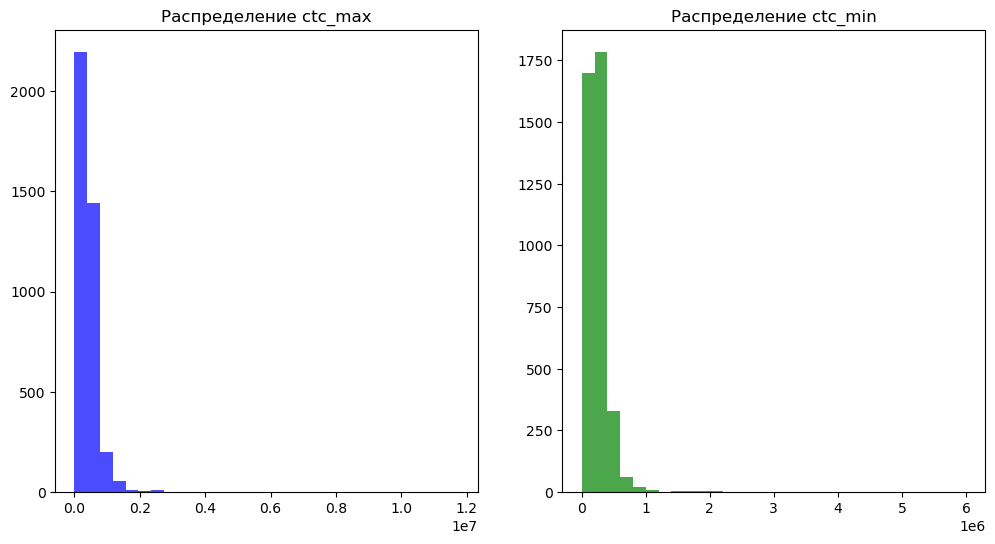

In [723]:
ctc_max = df['ctc_max']
ctc_min = df['ctc_min']

plt.figure(figsize=(12,6))

plt.subplot(1, 2, 2)
plt.hist(ctc_min, bins=30, color='green', alpha=0.7)
plt.title('Распределение ctc_min')

plt.subplot(1, 2, 1)
plt.hist(ctc_max, bins=30, color='blue', alpha=0.7)
plt.title('Распределение ctc_max')

plt.show()